In [1]:
get_ipython().run_line_magic("config", "InlineBackend.figure_format = 'retina'")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def exponential_loss(yF):
    """
    Args:
        yF: the product of true label (y ∈ {-1, 1}) and the predicted label (F is a real number)
    """
    return np.exp(-yF)

In [4]:
def binomial_deviance(yF):
    """Adds constant - np.log(2) + 1 so that it passes the point (0, 1).    
    Such scaling doesn't match the plot in book page 347 well. Not sure
    how exactly it is scaled in the book.
    """
    return np.log(1 + np.exp(- 2 * yF)) - np.log(2) + 1

In [5]:
def squared_error_loss(yF):
    """Shifts right by 1 to go through point (0, 1)."""
    return (yF - 1) ** 2

In [6]:
def svm_hinge_loss(yF):
    delta = 1 - yF
    mask_g = delta > 0
    mask_le = delta <= 0
    delta[mask_le] = 0
    return delta


def test_svm_hinge_loss() -> None:
    actual = svm_hinge_loss(np.array([-2, -1, 0, 1, 2]))
    expected = np.array([3, 2, 1, 0, 0])
    np.testing.assert_allclose(actual, expected)
    
test_svm_hinge_loss()

In [7]:
def misclassification(yF):
    return (yF < 0).astype(int)

Reproduce the Figure 10.4 at Page 347 from https://web.stanford.edu/~hastie/Papers/ESLII.pdf

Text(0, 0.5, 'Loss')

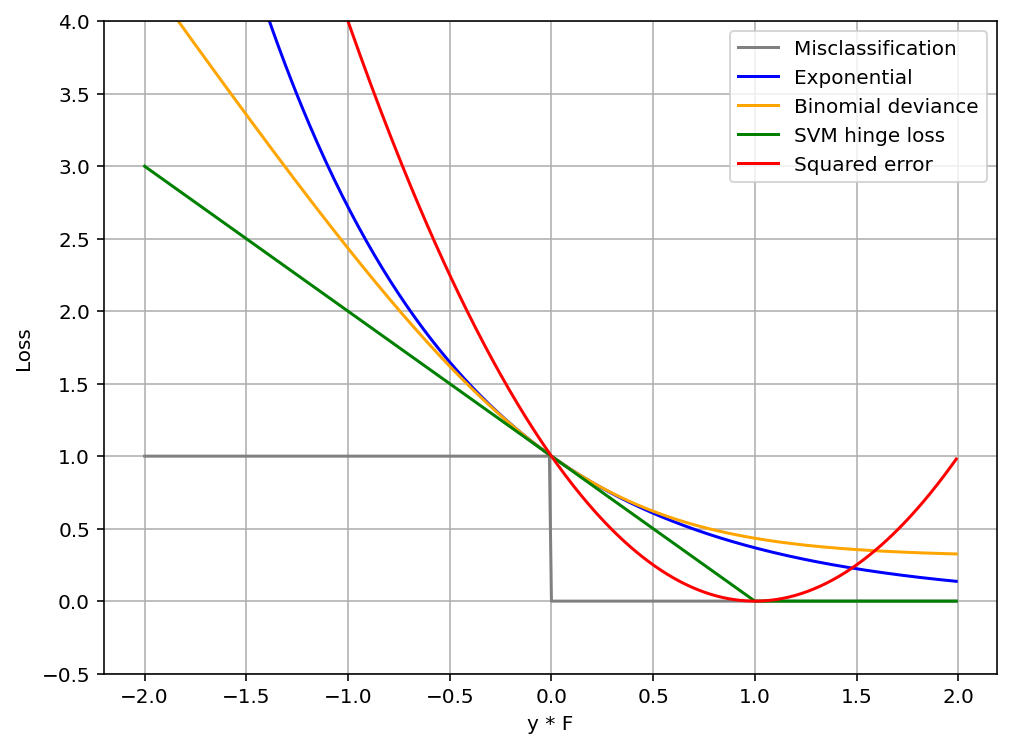

In [8]:
fig = plt.figure(figsize=(8, 6))

yFs = np.arange(-2, 2, 0.01)
plt.plot(yFs, misclassification(yFs), label='Misclassification', color='gray')
plt.plot(yFs, exponential_loss(yFs), label='Exponential', color='blue')
plt.plot(yFs, binomial_deviance(yFs), label='Binomial deviance', color='orange')
plt.plot(yFs, svm_hinge_loss(yFs), label='SVM hinge loss', color='green')
plt.plot(yFs, squared_error_loss(yFs), label='Squared error', color='red')

plt.legend()
plt.ylim(-0.5, 4)
plt.grid()
plt.xlabel('y * F')
plt.ylabel('Loss')

A zoom-out version

Text(0, 0.5, 'Loss')

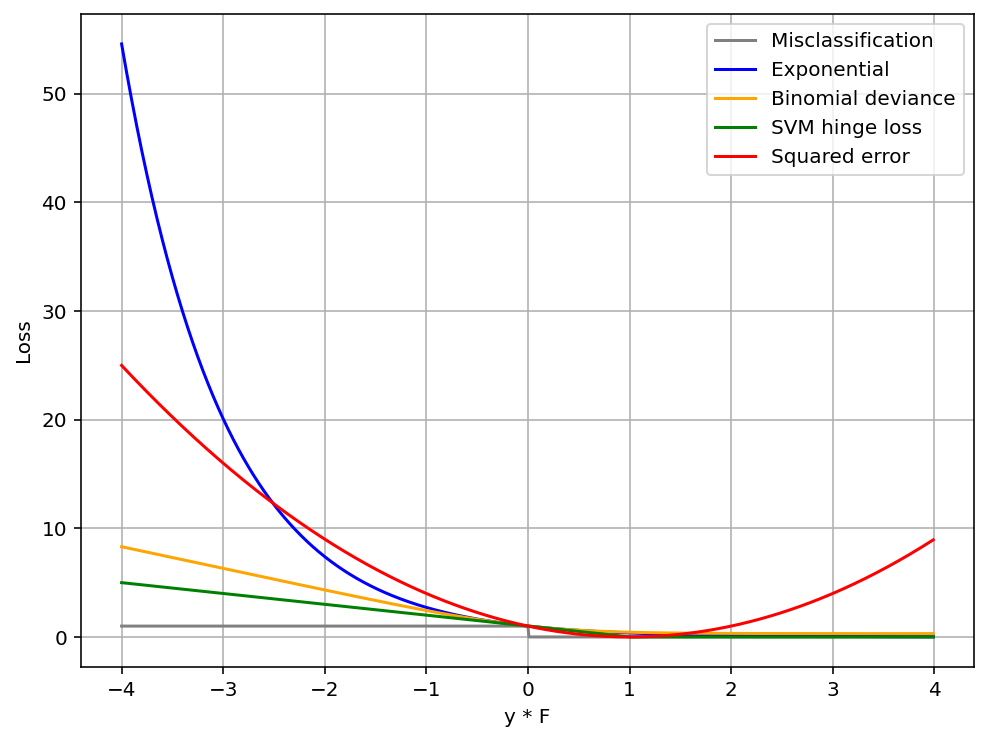

In [9]:
fig = plt.figure(figsize=(8, 6))

yFs = np.arange(-4, 4, 0.01)
plt.plot(yFs, misclassification(yFs), label='Misclassification', color='gray')
plt.plot(yFs, exponential_loss(yFs), label='Exponential', color='blue')
plt.plot(yFs, binomial_deviance(yFs), label='Binomial deviance', color='orange')
plt.plot(yFs, svm_hinge_loss(yFs), label='SVM hinge loss', color='green')
plt.plot(yFs, squared_error_loss(yFs), label='Squared error', color='red')

plt.legend()
# plt.ylim(-0.5, 4)
plt.grid()
# plt.xlim(-2, 2)
plt.xlabel('y * F')
plt.ylabel('Loss')